# 0701 I04 Linear Regression - Bin Liao

## Project Overview

The primary objective of this project is to build and hone data science skills, specifically in the areas of data loading, exploratory data analysis (EDA), and regression modeling. We will be using the popular 'Medical Cost Personal Dataset' from Kaggle to conduct this exercise.

In this project, we will:

- Load the data from a GitHub repository.
- Check the data types and add any missing types as necessary.
- Perform exploratory data analysis to understand the data better.
- Formulate a business question and answer it using a regression model.
- Validate the model using appropriate metrics.
- Visualize the data to gain and share insights.

## Dataset Overview - Medical Cost Personal Dataset

The dataset we are using for this project originates from Kaggle's 'Medical Cost Personal Dataset'. This dataset provides a rich collection of data representing individual medical costs billed by health insurance. 

The dataset features the following attributes:

- **age**: The age of the primary beneficiary.
- **sex**: The gender of the primary beneficiary - male or female.
- **bmi**: The body mass index (BMI), which provides an understanding of body weight based on a person's height and weight. 
- **children**: The number of children covered by health insurance / the number of dependents.
- **smoker**: Indicates whether the beneficiary is a smoker or not.
- **region**: The beneficiary's residential area in the US - northeast, southeast, southwest, or northwest.
- **charges**: Individual medical costs billed by health insurance.

With the help of this dataset, we will predict medical insurance charges based on features such as age, BMI, and the number of children. This is a practical and common use case in the healthcare sector, where understanding the factors influencing insurance charges can be essential to various stakeholders.


## Project Initialzation and Data Loading

In this initial task, we set up our Python environment by importing the necessary libraries for data manipulation, exploration, modeling, and visualization. We then load our chosen dataset, 'Medical Cost Personal Dataset', directly from a GitHub repository into a pandas DataFrame.

In [421]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os as os


# If the data file are not exist, download it from the given url.
def download_and_load_data(file_name, url):
    data_dir = 'data'
    file_path = os.path.join(data_dir, file_name)

    # Check if the data file exists
    if not os.path.isfile(file_path):
        # If not, check if the data directory exists
        if not os.path.isdir(data_dir):
            # If not, create the data directory
            os.makedirs(data_dir)
        
        # Download the data file
        print(f'Downloading file from {url} ...')
        !wget -O {file_path} {url}
        print(f'File downloaded and saved to {file_path}')

    # Load data into a dataframe.
    df = pd.read_csv(file_path)
    return df

url = 'https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/datas/mediacal_cost.csv'

medical_cost_df = download_and_load_data('medical_cost.csv', url)


## Data Preprocessing and Analysis

In this task, we take steps to understand and prepare our data for analysis. First, we examine the data types in our dataset to ensure that it fulfills the requirement of containing at least three of the five prescribed data types: float (numeric), int (numeric), datetime64 (Date), logical (Boolean), and object (String). If any of these types are missing, we create a new column and generate data as necessary to fulfill this requirement.

We then perform exploratory data analysis (EDA), using tools such as summary statistics, histograms, and boxplots, to gain a comprehensive understanding of the distributions and relationships in our data. We also check for missing values and outliers, addressing these as necessary to ensure the quality and reliability of our subsequent modeling.

In [422]:
# Print the first 5 lines of data set.
medical_cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [423]:
# Check the data type
medical_cost_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset has two numeric types (int64 and float64), and one object type (string). In this case, we add a column with '**boolean**' type named '**high_charges**'. This value of high_charges will set to true when '**charges**' is above the median of 'charges'; otherwise will set to false.  

In [424]:
# Compute the median of 'charges'
median_charges = medical_cost_df['charges'].median()

print("The median charges of the medical cost is ", median_charges)

# Define the data for the new column 'high_charges'
high_charges_data = medical_cost_df['charges'] > median_charges

# Get the index of the 'charges' column
idx = medical_cost_df.columns.get_loc('charges')

# Insert the new column 'High_Charges' just before the 'charges' column
medical_cost_df.insert(idx, 'high_charges', high_charges_data)


The median charges of the medical cost is  9382.033


In [425]:
# the infomation of the medical cost data set.
medical_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   high_charges  1338 non-null   bool   
 7   charges       1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 74.6+ KB


In [426]:
# Check the duplicates records
duplicate = medical_cost_df[medical_cost_df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,high_charges,charges
581,19,male,30.59,0,no,northwest,False,1639.5631


In [427]:
# drop the duplicate records
medical_cost_df = medical_cost_df.drop_duplicates()

# Chech the null values.
print(medical_cost_df.isnull().sum())

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
high_charges    0
charges         0
dtype: int64


##  Exploratory Data Analysis (EDA):

In this task, we use pandas and other libraries to understand the characteristics and distributions of the data.

In [428]:
# Five number summary of the medical cost dataset.
medical_cost_df.describe().style.format("{:.3f}")

,age,bmi,children,charges
count,1337.000,1337.000,1337.000,1337.000
mean,39.222,30.663,1.096,13279.121
std,14.044,6.100,1.206,12110.360
min,18.000,15.960,0.000,1121.874
25%,27.000,26.290,0.000,4746.344
50%,39.000,30.400,1.000,9386.161
75%,51.000,34.700,2.000,16657.717
max,64.000,53.130,5.000,63770.428


### Distrubtion of the 'age', 'sex', bmi', childre, 'smoker', and 'region' attributes.

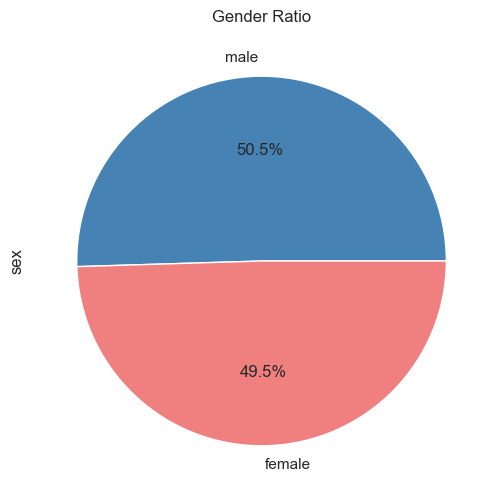

In [429]:
# The Gender Ratio of the dataset
plt.figure(figsize=(8, 6))
medical_cost_df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'lightcoral'])
plt.title('Gender Ratio')
plt.show()

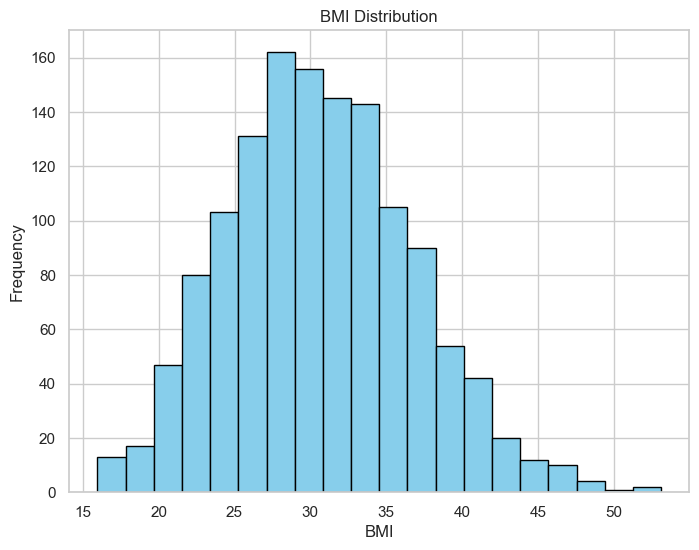

In [430]:
# BMI Distribution of the medical cost dataset
plt.figure(figsize=(8, 6))
plt.hist(medical_cost_df['bmi'], bins=20, edgecolor='black',  color='skyblue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

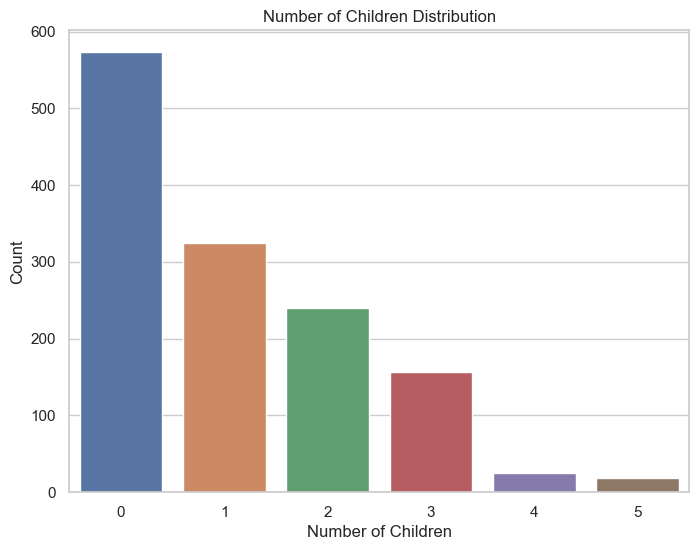

In [431]:
# Children distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=medical_cost_df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

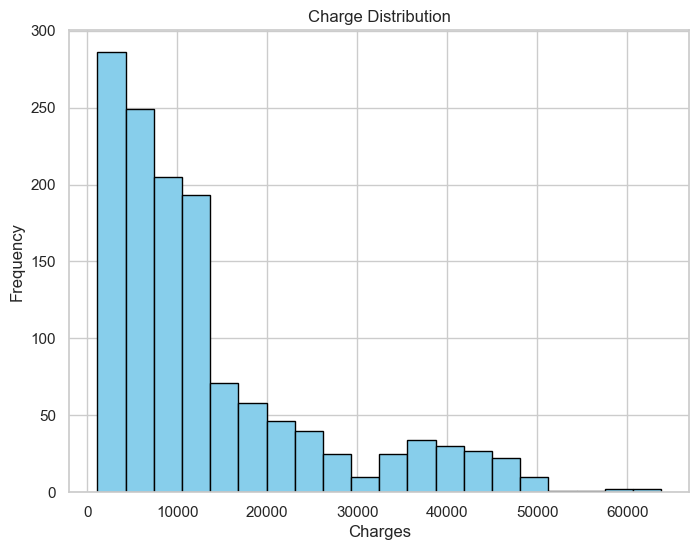

In [432]:
# The Distribution of the Charge.
plt.figure(figsize=(8, 6))
plt.hist(medical_cost_df['charges'], bins=20, edgecolor='black', color = 'skyblue')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charge Distribution')
plt.show()

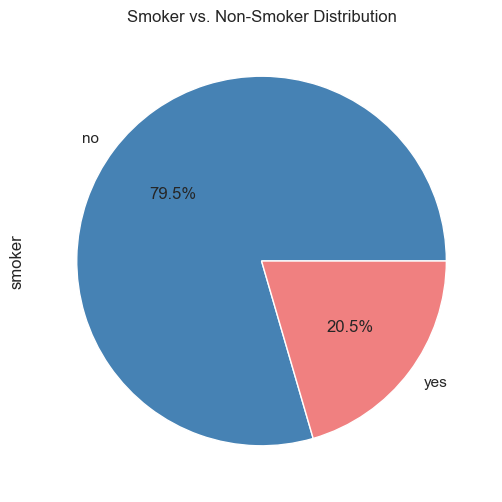

In [433]:
# Smokers 
plt.figure(figsize=(8, 6))
medical_cost_df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'lightcoral'])
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

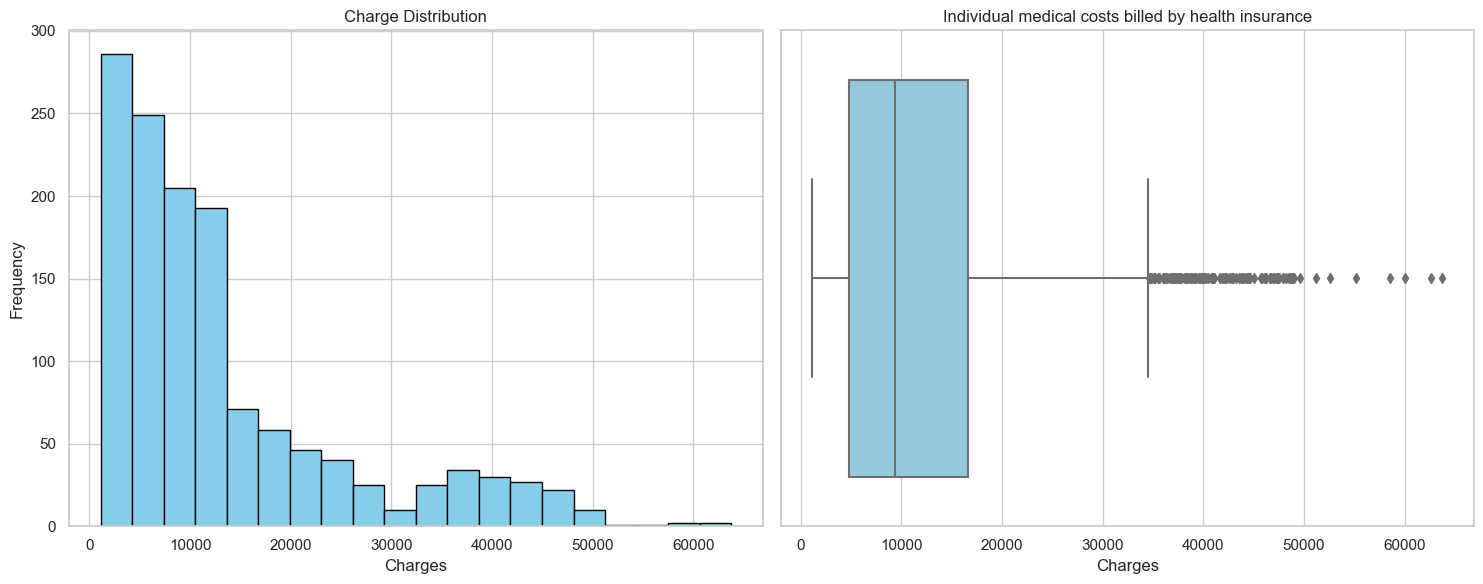

In [434]:
# Charge distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot histogram
axes[0].hist(medical_cost_df['charges'], bins=20, edgecolor='black', color='skyblue')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Charge Distribution')

# Plot boxplot
sns.boxplot(x=medical_cost_df['charges'], color='skyblue', ax=axes[1])
axes[1].set_title("Individual medical costs billed by health insurance")
axes[1].set_xlabel("Charges")

plt.tight_layout()

plt.show()

<Figure size 600x400 with 0 Axes>

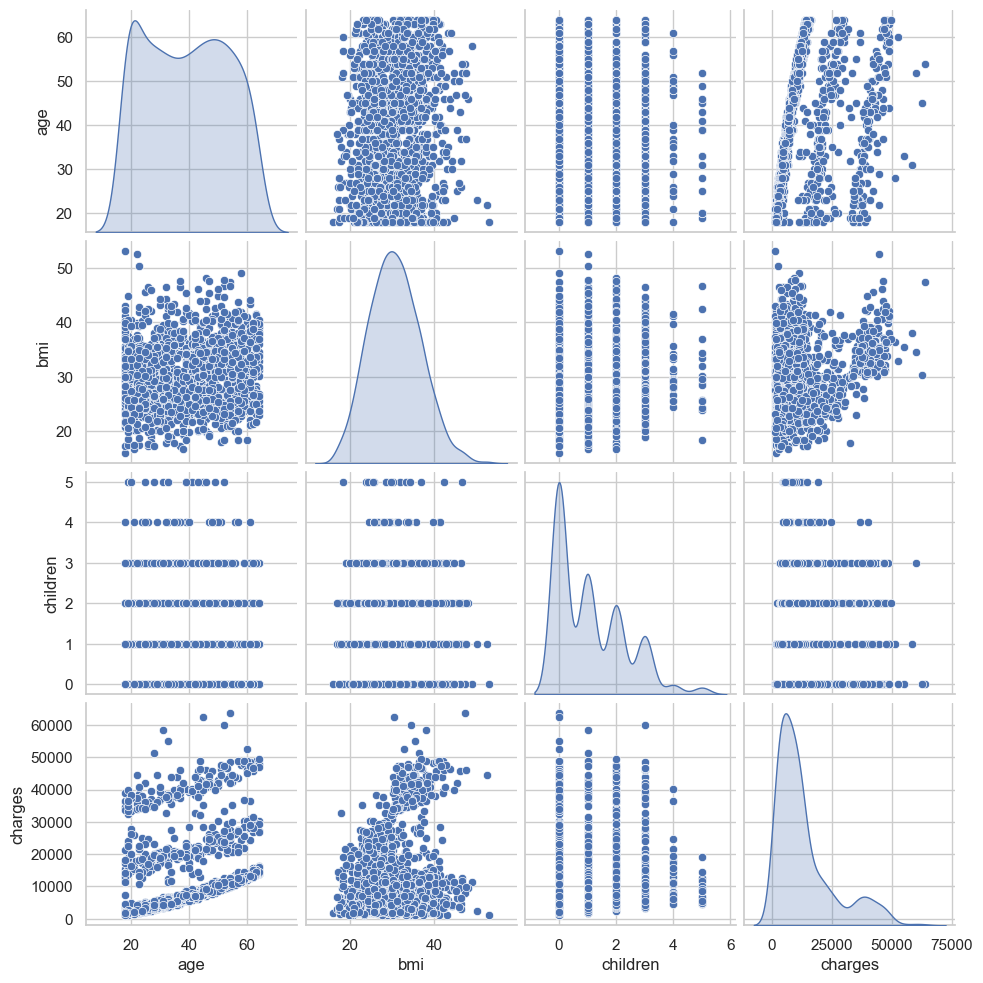

In [435]:
# The pairplot to present chart and each variables.
fig = plt.figure(figsize = (6, 4))
sns.pairplot(medical_cost_df.select_dtypes(include=[np.number]), diag_kind='kde')


## Formulate a Business Question:

In this step, we formulate a business question that can be answered using a predictive regression model. For this assignment, our question is "Can we predict medical insurance charges based on age, bmi, number of children, sex, smoker, and region?

### Preprocess the data
Before we construct the machine learning model, we need to convert the categorical variables into dummies.

In [436]:
# Convert the category variable:
medical_cost_df_model = pd.get_dummies(medical_cost_df, columns = ['sex', 'smoker', 'region', 'high_charges'], dtype = "int64")
medical_cost_df_model = medical_cost_df_model.drop(['sex_female', 'smoker_no', 'high_charges_False'], axis=1)
medical_cost_df_model.rename(columns = {'sex_male':'sex', 'smoker_yes':'smoker', 'high_charges_True':'high_charges'}, inplace = True) 

medical_cost_df_model.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex               1337 non-null   int64  
 5   smoker            1337 non-null   int64  
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
 10  high_charges      1337 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 157.6 KB


### LinerRegression Model Building

1. Data splict

In [437]:
from sklearn.model_selection import train_test_split

# Independent variable
X = medical_cost_df_model.drop(['charges'], axis=1)

# Dependent variable
y = medical_cost_df_model['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


2. Model Building

In [438]:
from sklearn.linear_model import LinearRegression
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

3. Model Evaluation:

In [439]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared Score:', r2)

Mean Squared Error (MSE): 6031.9389936436355
Root Mean Squared Error (RMSE): 77.66555860639667
R-squared Score: 0.7873727481468477


The performance of the Linear Regression model:

- **Mean Squared Error (MSE)**: This is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. In this case, the MSE is approximately 6031.94. The closer this value is to 0, the better the model performance.

- **Root Mean Squared Error (RMSE)**: This is the square root of the MSE. It is more interpretable than MSE as it has the same units as the response variable (in your case, medical charges). In our case, RMSE is approximately 77.67. Like MSE, lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response.

- **R-squared (R²)**: This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The closer to 1, the better the explanatory power of your model. In your case, R² is 0.7874 (or approximately 78.74%). This means that approximately 78.74% of the variability in '**charges**' can be explained by the variables in our model (age, bmi, number of children, sex, smoker, and region).

In conclusion, our linear regression model seems to have a relatively good fit as the R² is accetpable high. However, the RMSE is also substantial, indicating that our model's predictions are, on average, about $77.67 off from the actual charges. This can be acceptable or not depending on the context—medical charges can vary greatly, so a deviation of $77.67 might not be significant in context. However, always aim to minimize the RMSE and MSE and maximize R². Improvements to the model could possibly be made by using more complex modelling techniques, incorporating more features if available, or fine-tuning the model parameters.


4. Cross-validation

    Use 10-fold Cross-validation to get the estimate of the model's performance

In [440]:
from sklearn.model_selection import cross_val_score, KFold

# Create a Linear Regression model
lm = LinearRegression()

# Use 10-fold Cross-validation to get the estimate of the model's performance
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(lm, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# print scores
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())
print("95% confidence level: ", np.quantile(rmse_scores, [0.025, 0.975]))


Scores: [6227.22195465 5547.23003656 6097.54171497 5509.7698206  5689.61418695
 5631.81881295 5656.84726333 5751.98145563 5512.47424318 5656.34638061]
Mean: 5728.0845869424165
Standard deviation: 231.0916409143541
95% confidence level:  [5510.37831568 6198.04390072]


The result of the cross-validation tells us the following:

- **Scores**: These are the Root Mean Squared Error (RMSE) scores for each of the 10-folds used in the cross-validation. RMSE is a measure of how well the model is able to predict the charge, with lower values indicating better fit. The RMSE for each fold gives us an idea of the variation in the model performance.

- **Mean**: The mean of these scores (5728.08) is the average RMSE when the model is applied to new data. This gives us a general idea of how much error the model makes in its predictions. In this case, the model, on average, is off by about $6080.88 in predicting charges.

- **Standard** deviation: The standard deviation (231.09) measures the variability in the RMSE scores. A lower standard deviation would indicate that the model's performance is more stable across different subsets of the dataset. This means our model's performance doesn't vary wildly with different subsets of data.

-  **95% confidence level**: This gives an interval estimate that the RMSE will fall between [5510.38, 6198.04] 95% of the time. This interval gives us a range in which we expect the true RMSE of the model to lie, with 95% confidence. This can be useful to understand the range of possible model performance.

Overall, the model seems to have a decent performance, with an average RMSE of 5728.08 and a relatively small standard deviation. This suggests that the model's performance is fairly stable and it is reasonably good at predicting medical charges based on age, bmi, number of children, sex, smoker, and region. However, the errors in prediction are relatively high (in the thousands of dollars), which could be significant depending on the context. It might be worth exploring if adding more features or using a different type of model could improve performance.

## Visualizations

Create 6 visualizations using matplotib and seaborn, and provide insights on what we found.

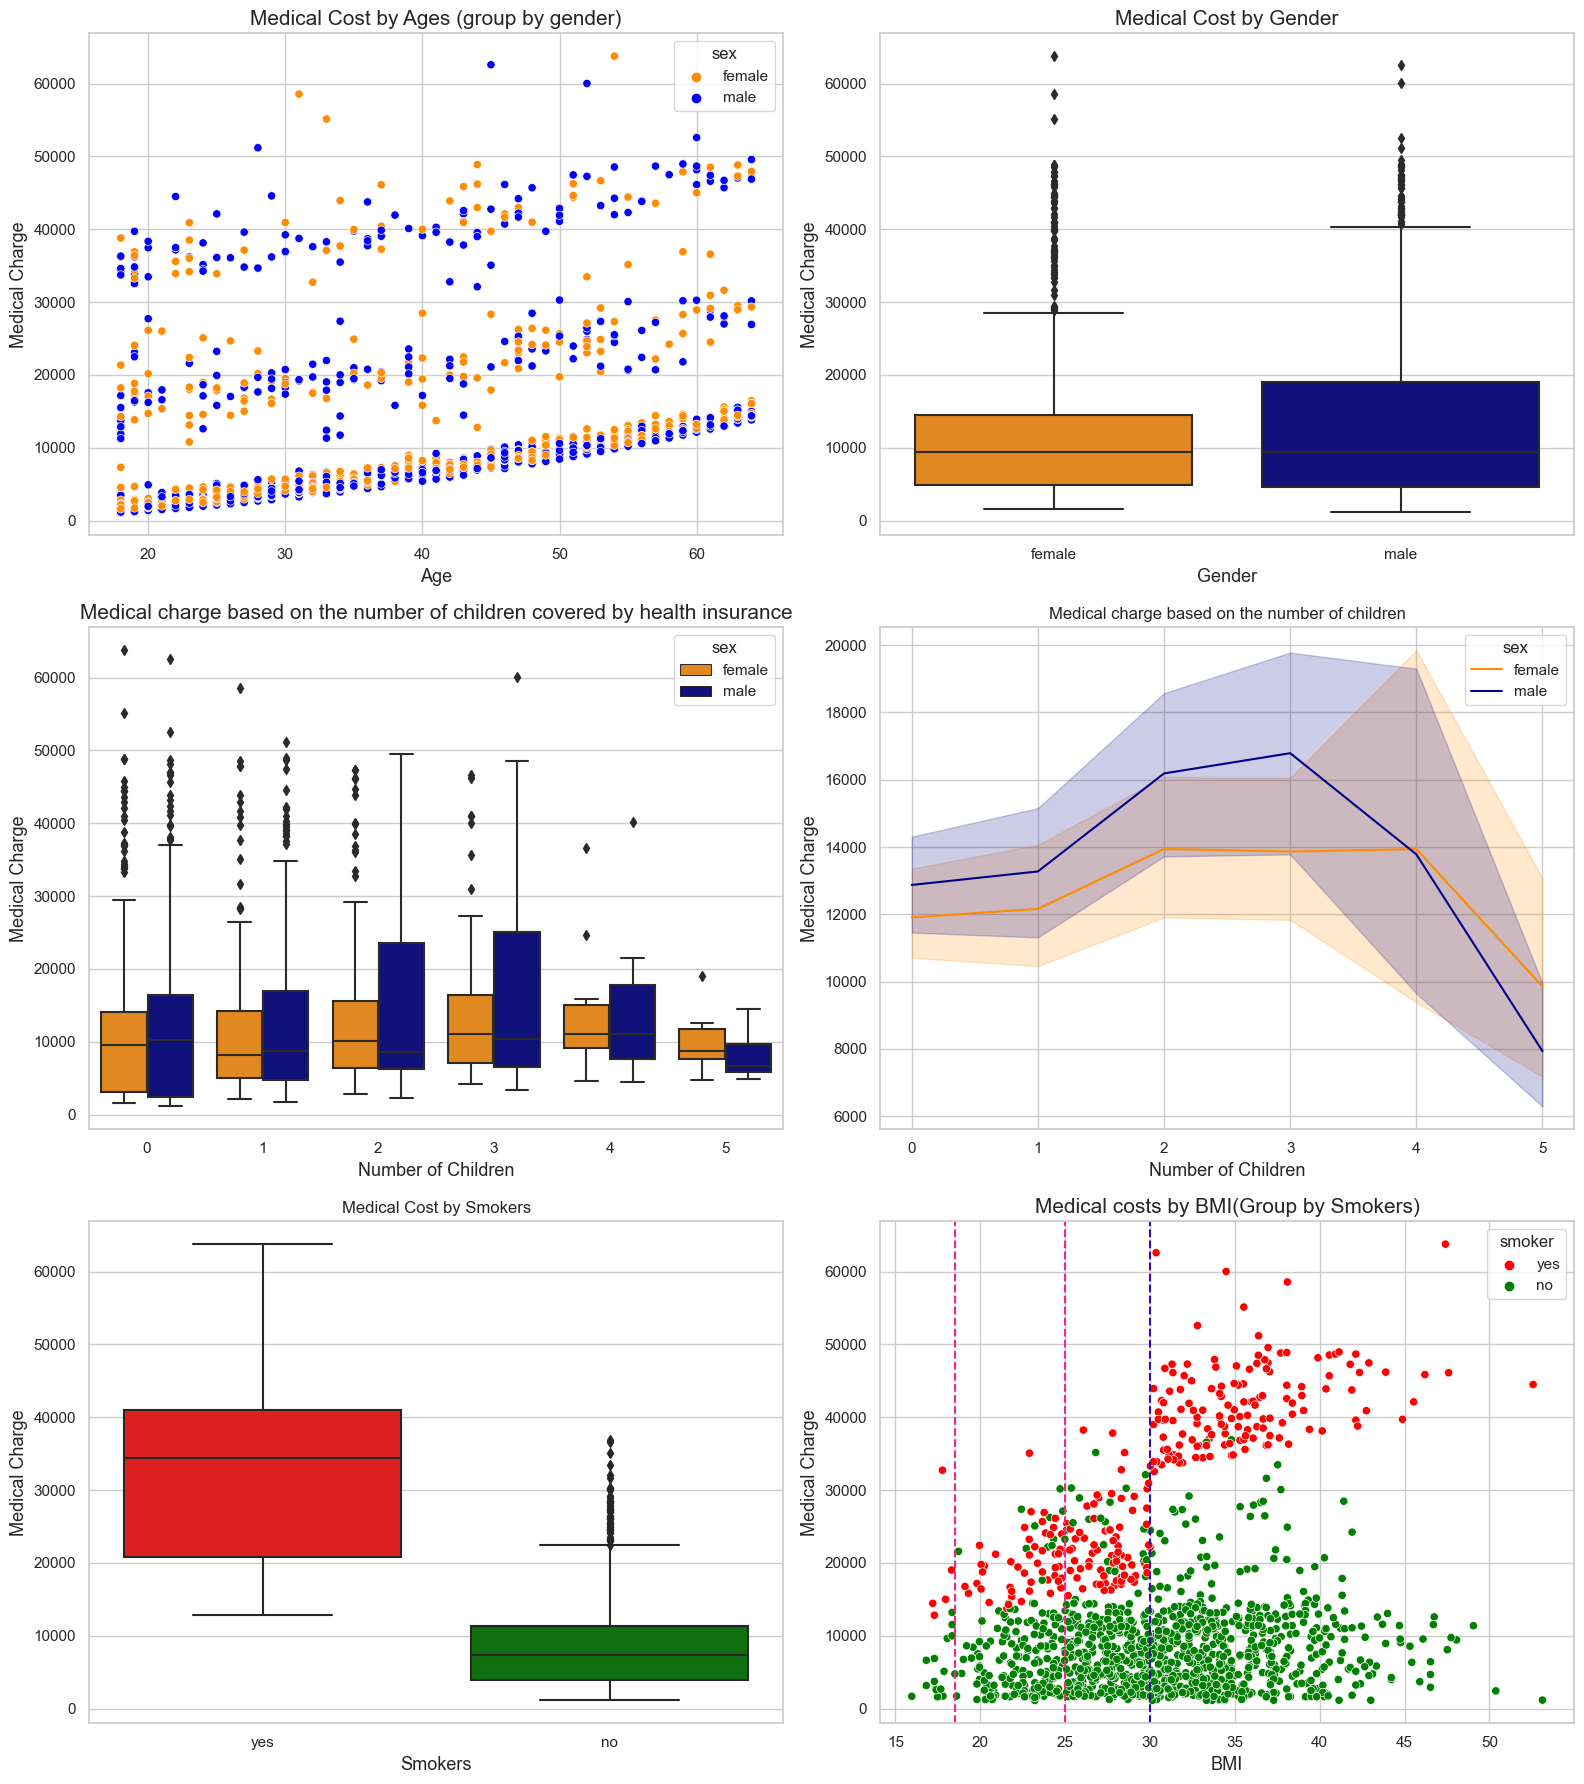

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall aesthetic
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Scatter plot of 'age' vs 'charges'
sns.scatterplot(data=medical_cost_df, x='age', y='charges', hue="sex", palette = {"male": "blue", "female": "darkorange"}, ax=axs[0,0])
axs[0, 0].set_title('Medical Cost by Ages (group by gender)', fontsize=15)
axs[0, 0].set_xlabel('Age', fontsize=13)
axs[0, 0].set_ylabel('Medical Charge', fontsize=13)

# Box plot of 'gender' vs 'charges'
sns.boxplot(data=medical_cost_df, x='sex', y='charges', palette = {"male": "darkblue", "female": "darkorange"}, ax=axs[0,1])
axs[0, 1].set_title('Medical Cost by Gender', fontsize=15)
axs[0, 1].set_xlabel("Gender", fontsize=13)
axs[0, 1].set_ylabel('Medical Charge', fontsize=13)

# Bar plot of 'children' vs 'charges'
sns.boxplot(data=medical_cost_df, x='children', y='charges', hue='sex', palette = {"male": "darkblue", "female": "darkorange"}, ax = axs[1, 0])
axs[1, 0].set_title("Medical charge based on the number of children covered by health insurance", fontsize=15)
axs[1, 0].set_xlabel("Number of Children", fontsize=13)
axs[1, 0].set_ylabel("Medical Charge", fontsize=13)

# Line plot of 'children' vs charge
sns.lineplot(data=medical_cost_df, x='children', y='charges', hue='sex', palette = {"male": "darkblue", "female": "darkorange"}, ax = axs[1,1])
axs[1, 1].set_title("Medical charge based on the number of children")
axs[1, 1].set_xlabel("Number of Children", fontsize=13)
axs[1, 1].set_ylabel("Medical Charge", fontsize=13)


sns.boxplot(data=medical_cost_df, x='smoker',y='charges', palette = {"yes": "red", "no": "green"}, ax=axs[2, 0])
axs[2, 0].set_title("Medical Cost by Smokers")
axs[2, 0].set_xlabel("Smokers", fontsize=13)
axs[2, 0].set_ylabel("Medical Charge", fontsize=13)

# Scatter plot of 'bmi' vs 'charges'
sns.scatterplot(data=medical_cost_df, x='bmi', y='charges', hue='smoker',palette = {"yes": "red", "no": "green"}, ax=axs[2, 1])
axs[2, 1].axvline(x=18.5, color='#F72585', linestyle='--')
axs[2, 1].axvline(x=25, color='#F72585', linestyle='--')
axs[2, 1].axvline(x=30, color='#3A0CA3', linestyle='--')
axs[2, 1].set_title('Medical costs by BMI(Group by Smokers)', fontsize=15)
axs[2, 1].set_xlabel("BMI", fontsize=13)
axs[2, 1].set_ylabel("Medical Charge", fontsize=13)


plt.tight_layout()
plt.show()


Some extract data to support the insights:

In [442]:
# Table: Medical bills more than 30000 based on genders
print("Medical bills more than 30000 based on genders")
medical_cost_df[medical_cost_df['charges']>30000].groupby(['sex'])['age'].count().reset_index()

Medical bills more than 30000 based on genders


,sex,age
0,female,59
1,male,103


In [443]:
print("The median cost by gender")
medical_cost_df.groupby(['sex'])['charges'].mean()

The median cost by gender


sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

###  Observation from the visualiaztion:

#### Age, Gender and Medical Costs:
- Our analysis highlights that there are a few individuals, specifically seven, aged between 28-60 (falling under the "adult" category), who have exceptionally high medical bills exceeding $50,000. Notably, these medical expenses surpass the general trend of 'higher age corresponding to increased costs'. Thus, other factors might be influencing their medical costs, such as specific health conditions or different charges from insurance companies.
-  From the scatter plot "Medical Costs by Ages (group by gender)", we observe a more scattered distribution of costs within the middle-age group. This variation might be attributable to a combination of factors including a greater prevalence of health issues or discrepancies in insurance charges among different providers.
- In the upper range of the scatter plot, males outnumber females. This pattern could suggest that males might have a higher risk of costly health conditions than females.

#### Impact of Number of Children on Medical Costs:
- Our observations reveal that individuals with three children generally incur the highest average medical costs. Conversely, those with five children seem to experience the lowest average costs.
-  There's a clear trend where medical costs rise with an increase in the number of children up to three. However, when the number of children exceeds three, we witness a sharp decline in costs.
Gender also plays a role in this context. Females with up to three children generally have lower medical expenses compared to males. - However, the pattern reverses for females with four or more children, where their expenses start exceeding those of males.

#### Smoking Status and Medical Costs:
- The "Medical Cost by Smokers" box chart illustrates a prominent trend that smokers usually face higher medical expenses compared to non-smokers.
- From the "Medical costs by BMI (group by Smoker)" scatter plot, we can infer that smokers' medical costs tend to rise substantially with an increase in BMI. Non-smokers, even those with a high BMI, typically have much lower costs, with few exceptions.
- There are some non-smokers with normal BMI who face relatively high medical costs. This could imply the presence of other health factors influencing their costs apart from their body mass.